In [5]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt

# stats libraries
import statsmodels.api as sm
import scipy

# show plots in the notebook
%matplotlib inline 

# this limit the data that will be shown, so I won't be seeing a huge dataset, but the first and last few
from pandas import set_option
set_option('display.max_rows',6)

In [6]:
# load dataset
filename = '../data/t198201_elev.csv'

temp82_01 = pd.read_csv(filename, sep=',')
temp82_01

,VALUE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,1,5027766,0.722193,-99.90,20.88,120.78,11.12530,25.130000,55935200.00
1,2,1515456,0.217682,-99.90,20.88,120.78,14.51680,14.574300,21999600.00
2,3,1099428,0.157923,-99.90,20.88,120.78,14.66240,11.398700,16120200.00
...,...,...,...,...,...,...,...,...,...
76,77,236,0.000034,0.51,3.15,2.64,1.46449,0.995280,345.62
77,78,59,0.000008,0.51,2.25,1.74,1.12932,0.833103,66.63
78,79,15,0.000002,0.51,0.51,0.00,0.51000,0.000000,7.65


In [20]:
# The dataset uses VALUE 1-79 as a elevation range (1 = 0-50m, 2 = 50-100m, 3 = 100-150m, and so on)
# I want to make it more explicit, so I added the elevation column
temp82_01['Elevation(m)']=temp82_01['VALUE']*50

#tried to add unit for clarification but I think it printed both, you choose!

In [22]:
#add table head to show column was added
print(temp82_01.head())

   VALUE    COUNT      AREA   MIN    MAX   RANGE     MEAN       STD       SUM  \
0      1  5027766  0.722193 -99.9  20.88  120.78  11.1253  25.13000  55935200   
1      2  1515456  0.217682 -99.9  20.88  120.78  14.5168  14.57430  21999600   
2      3  1099428  0.157923 -99.9  20.88  120.78  14.6624  11.39870  16120200   
3      4   867898  0.124666 -99.9  20.83  120.73  14.6919   9.14129  12751100   
4      5   754824  0.108424 -99.9  20.83  120.73  14.7871   7.29792  11161600   

   Elevation  Elevation(m)  
0         50            50  
1        100           100  
2        150           150  
3        200           200  
4        250           250  


In [23]:
# Calculate the mean (of the MEAN) temperatures of all elevation range in January 1982
#clarify^

print(temp82_01['MEAN'].mean())

#say when loaded table that its for jan. 1982 if that's how you'll refrence it through out


7.768136835443035


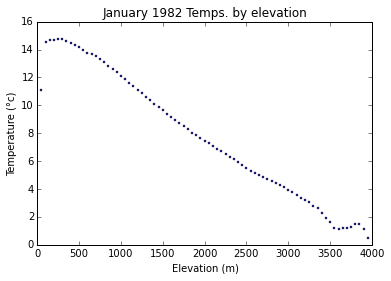

In [26]:
#need title and comment for this step
#graph is a nice readable size 

plt.plot(temp82_01.Elevation, temp82_01.MEAN, marker='o',markersize=2, linestyle='')
plt.xlabel("Elevation (m)")
plt.ylabel("Temperature (°c)")
plt.title('January 1982 Temps. by elevation')

Note the appearance of the graph to keep reader on track that your next step will be to analyze and add a trend line.

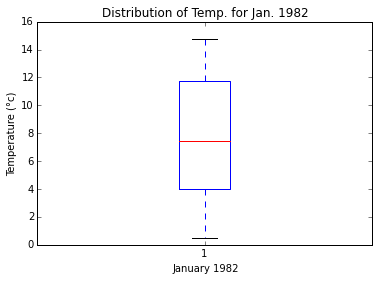

In [25]:
# This particular boxplot is not super helpful at this point, but Boxplot will be 
#extremely useful when I load the entire dataset (from 1982 to 2012), and I can see the 
#temperature changes in each month, each year, or each decade.

plt.boxplot(temp82_01['MEAN'])

plt.ylabel('Temperature (°c)')
plt.xlabel("January 1982")
plt.title('Distribution of Temp. for Jan. 1982')

In [11]:
#using ordinal least square to run linear regression to find the relationship 
#between temperature and elevation

temp_lm = sm.formula.ols(formula='MEAN ~ VALUE', data=temp82_01).fit()

In [12]:
#looking for the linear regression (y-intercept and slope) to construct a line equation

temp_lm.params

Intercept    15.546209
VALUE        -0.194452
dtype: float64

In [13]:
#maybe say why this is necessary 
#generate a data frame using pandas to produce a list of numbers from 1 to 80
newx = pd.DataFrame({'VALUE' : range(1,80)})

#using the lm.predict to predict the y (temperature value) based on x (elevation)
y_preds = temp_lm.predict(newx)

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


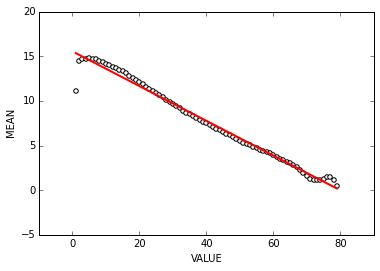

In [14]:
#generate a scatterplot on the temperature and elevation
temp82_01.plot(kind='scatter',x="VALUE", y='MEAN',c='w')
#ploting the abline 
plt.plot(newx, y_preds, color='red',linewidth=2)

In [15]:
#look for the summary for this linear model (looking for p-value and r-squared)
#we see that p-value is really low, which means the result is significant and not caused by random chances
#r-squared is extrememly high suggesting that the data fit the model very well. 
print(temp_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEAN   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4258.
Date:                Tue, 10 Nov 2015   Prob (F-statistic):           3.69e-69
Time:                        11:10:23   Log-Likelihood:                -71.251
No. Observations:                  79   AIC:                             146.5
Df Residuals:                      77   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.5462      0.137    113.303      0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a77b9e8>]], dtype=object)

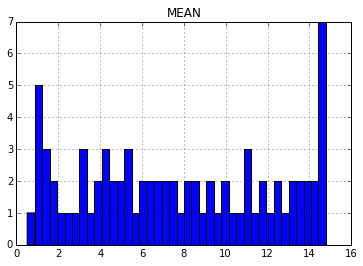

In [16]:
#to investigate the normality of the linear regression condition
#we see that it is not normally distributed, so perhaps other test would be more accurate.
temp82_01.hist(column='MEAN',bins=40)